/home/long/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


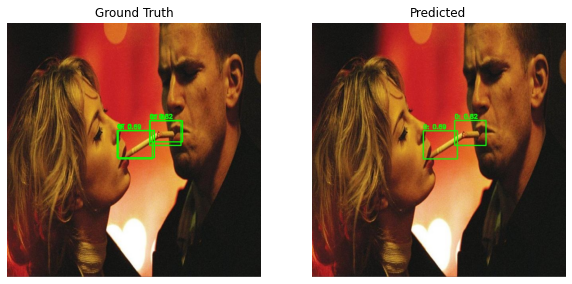

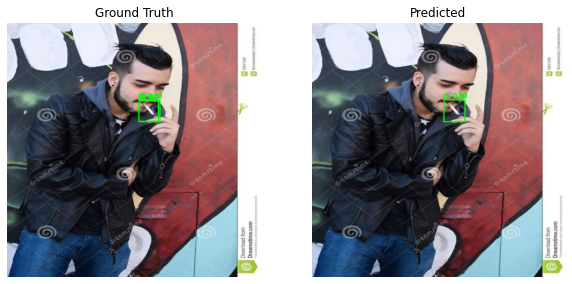

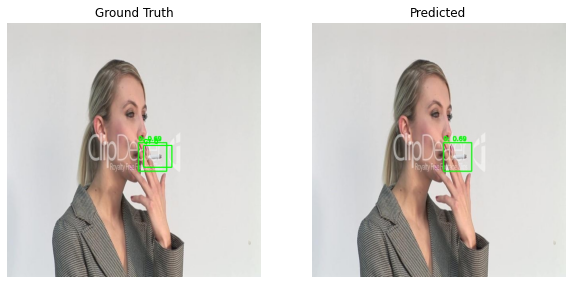

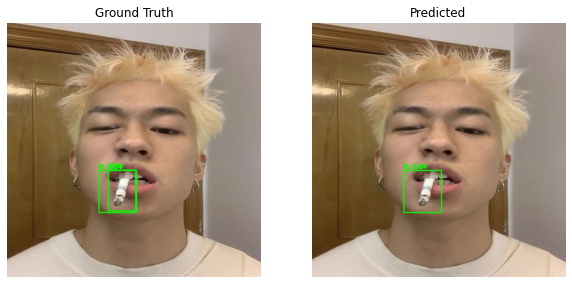

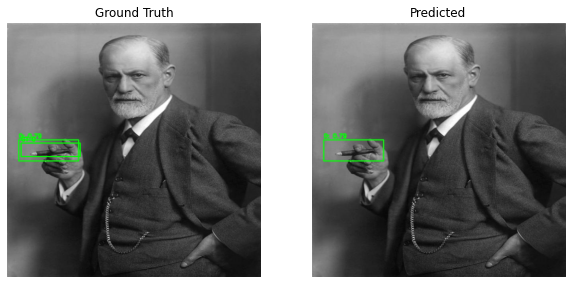

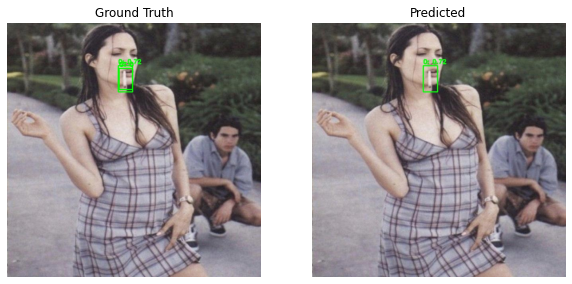

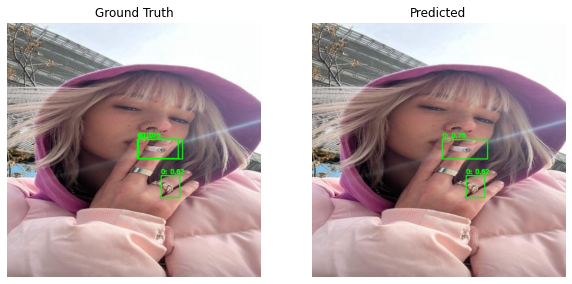

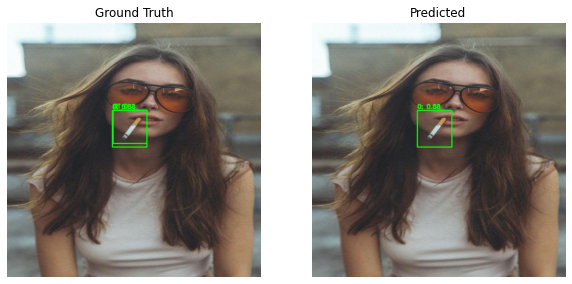

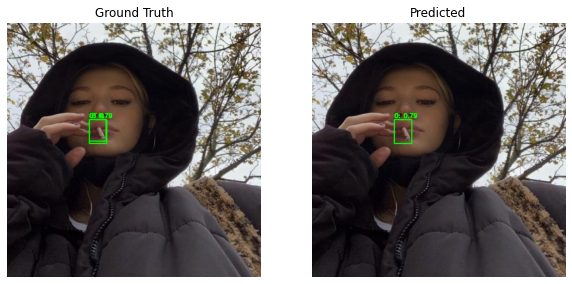

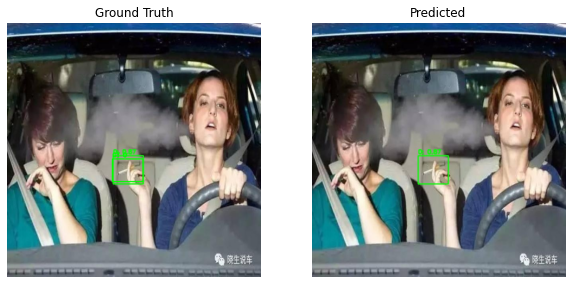

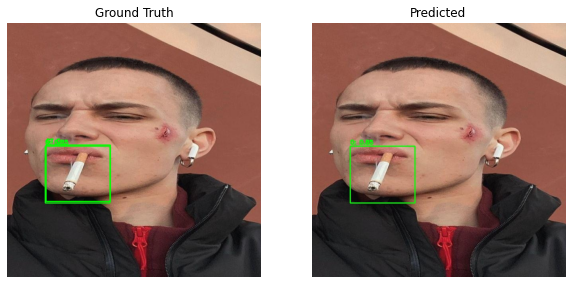

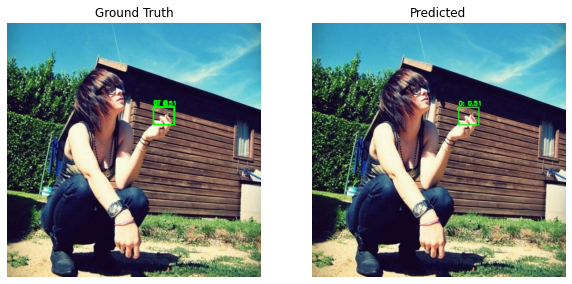

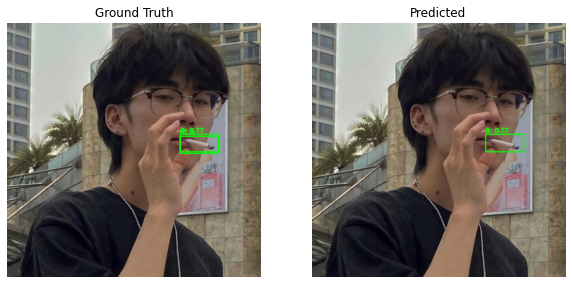

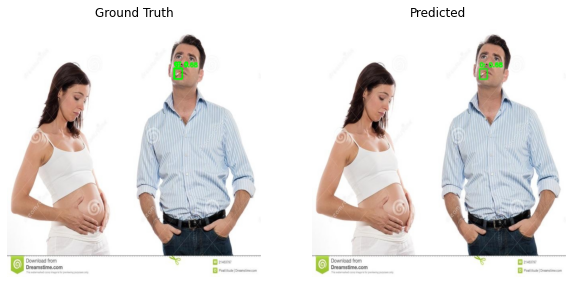

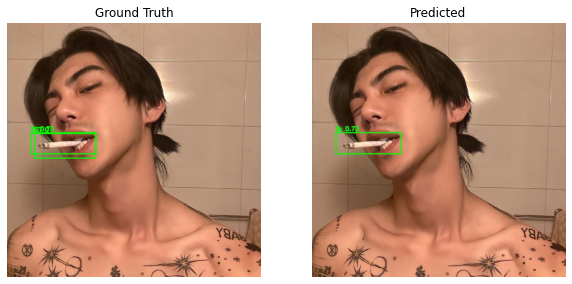

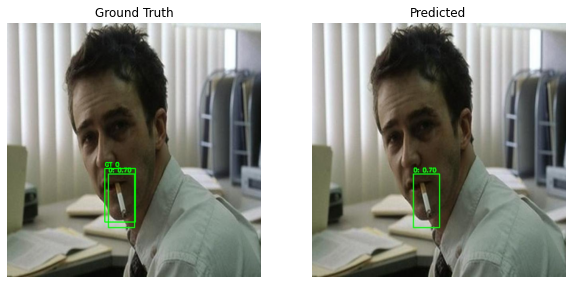

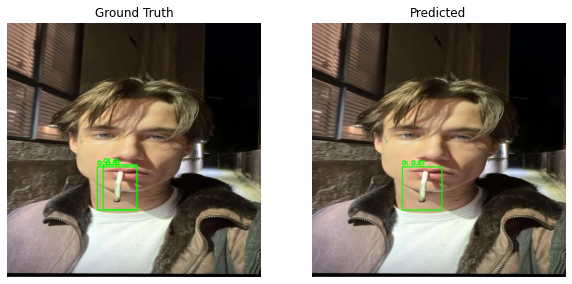

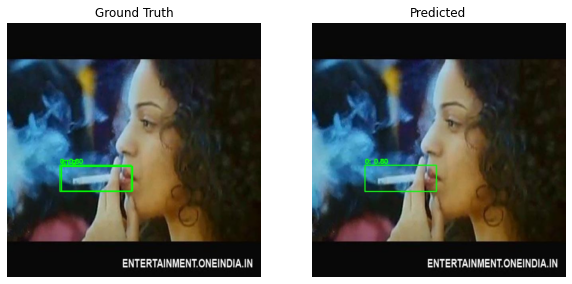

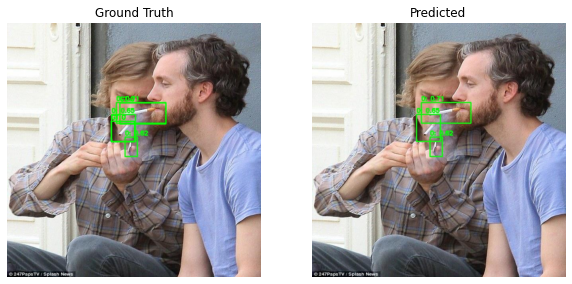

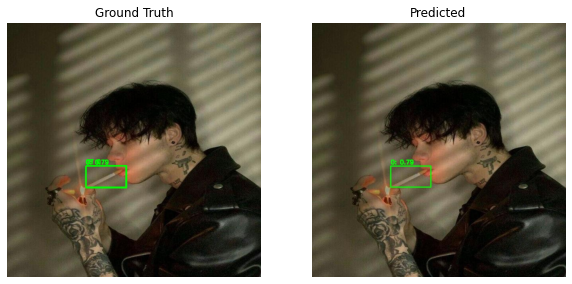

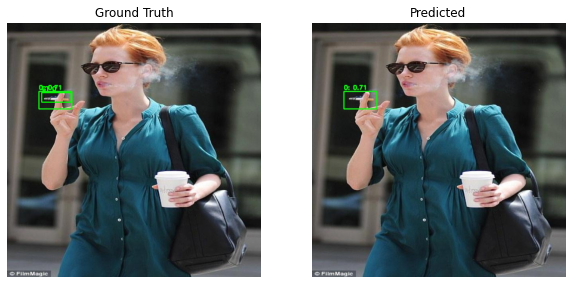

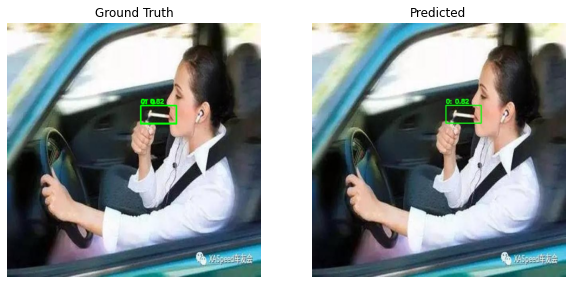

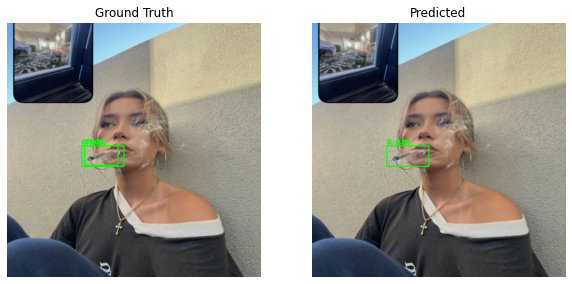

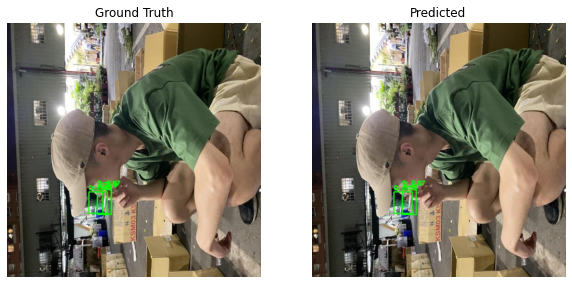

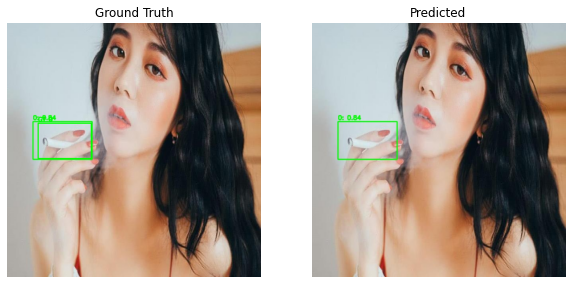

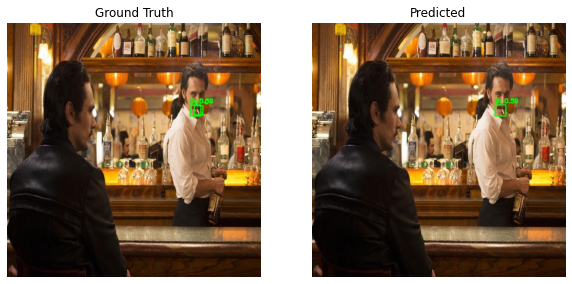

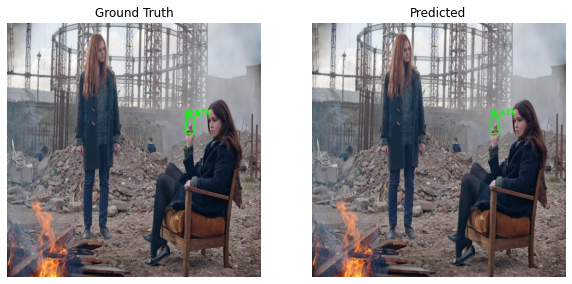

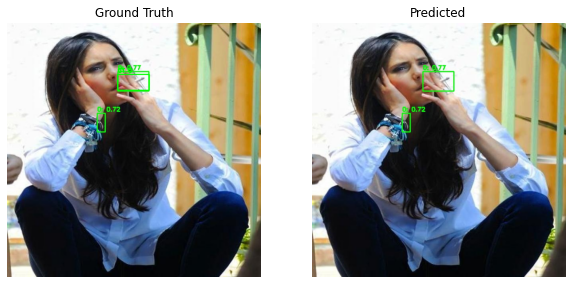

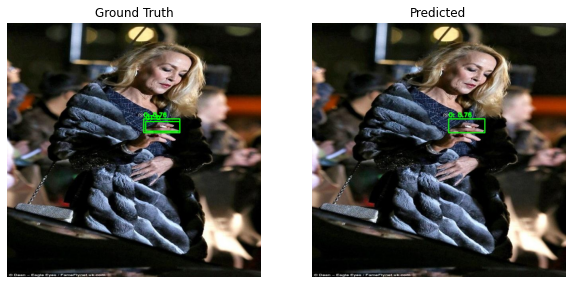

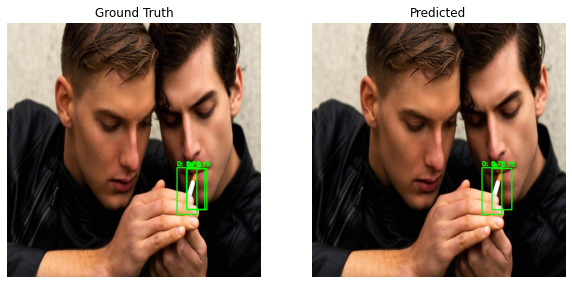

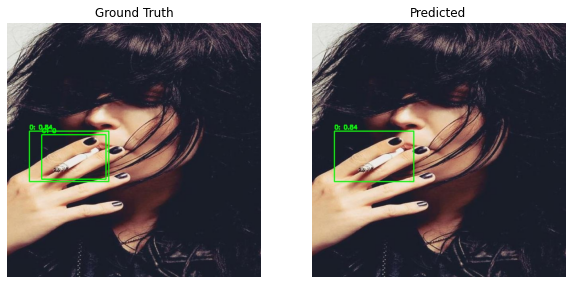

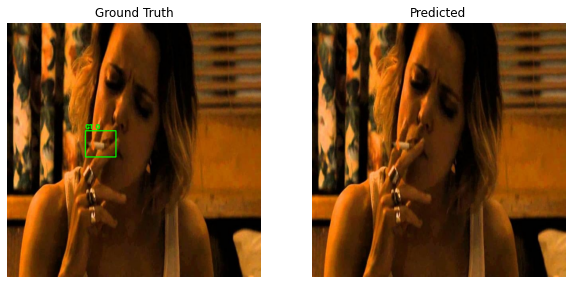

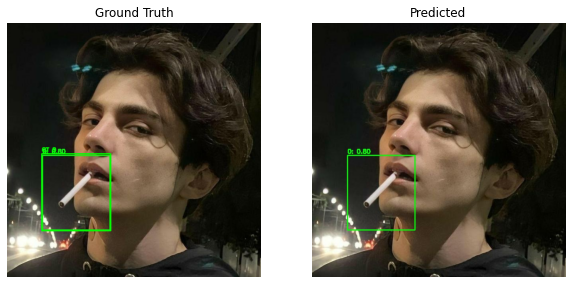

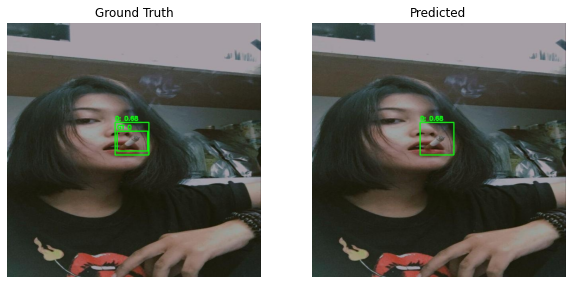

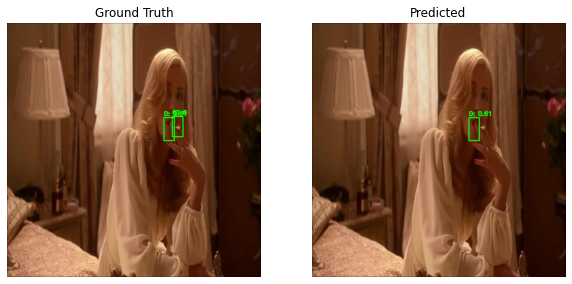

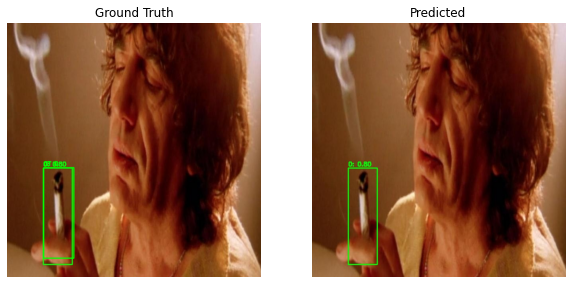

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_yolo_labels(label_path, img_width, img_height):
    """Load YOLO format labels and convert to pixel coordinates."""
    boxes = []
    if not os.path.exists(label_path):  # Ensure label file exists
        return boxes

    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) < 5:
                continue  # Skip malformed lines
            class_id, x_center, y_center, w, h = map(float, parts)
            x_min = int((x_center - w / 2) * img_width)
            y_min = int((y_center - h / 2) * img_height)
            x_max = int((x_center + w / 2) * img_width)
            y_max = int((y_center + h / 2) * img_height)
            boxes.append((x_min, y_min, x_max, y_max, int(class_id)))
    return boxes

def draw_bounding_boxes(image, boxes, color, label="GT"):
    """Draw bounding boxes on an image."""
    for (x_min, y_min, x_max, y_max, class_id) in boxes:
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(image, f"{label} {class_id}", (x_min, y_min - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

def visualize_results(predicted_folder, gt_folder, selected_images_folder):
    """Display ground truth side by side with predicted images."""
    
    # Ensure the folder exists and list only images
    if not os.path.exists(selected_images_folder):
        print(f"Error: Folder {selected_images_folder} not found!")
        return
    
    selected_images = [f for f in os.listdir(selected_images_folder) if f.endswith(('.jpg', '.png'))]

    if not selected_images:
        print("No images found in the selected folder.")
        return

    for img_name in selected_images:
        img_path = os.path.join(predicted_folder, img_name)
        gt_label_path = os.path.join(gt_folder, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        if not os.path.exists(img_path) or not os.path.exists(gt_label_path):
            print(f"Skipping {img_name}, missing files.")
            continue

        # Load original image (ground truth version)
        original_img = cv2.imread(img_path)
        if original_img is None:
            print(f"Error loading image: {img_name}")
            continue

        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        img_height, img_width, _ = original_img.shape

        # Load and draw ground truth boxes
        gt_boxes = load_yolo_labels(gt_label_path, img_width, img_height)
        gt_img = original_img.copy()
        gt_img = draw_bounding_boxes(gt_img, gt_boxes, (0, 255, 0), label="GT")  # Green boxes

        # Load predicted image (already has boxes)
        pred_img = cv2.imread(img_path)
        pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

        # Show images side by side
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(gt_img)
        ax[0].set_title("Ground Truth")
        ax[0].axis("off")

        ax[1].imshow(pred_img)
        ax[1].set_title("Predicted")
        ax[1].axis("off")

        plt.show()

# Example usage
predicted_folder = "/home/long/longdata/com vis/sahi predicted/visualized_k aug moi"
gt_folder = "/home/long/longdata/com vis/data/k aug/test/labels"
false_positive_folder = "error_analysis/false_positives"  

visualize_results(predicted_folder, gt_folder, false_positive_folder)
